### Import Libraries and Dependencies

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read in File and Clean Data

In [2]:
# Read CSV
csv_path = Path('../Resources/crypto_data.csv')
crypto_data = pd.read_csv(csv_path, index_col='data_date', parse_dates=True, infer_datetime_format=True)
crypto_data

# Drop all columns cryptocurrency and data_priceUsd
crypto_data = crypto_data.drop(columns=['data_time','timestamp'])

# Sort the dates in ascending order
crypto_data = crypto_data.sort_index()

# Drop missing values
crypto_data = crypto_data.dropna()
crypto_data.head()

,cryptocurrency,data_priceUsd
data_date,,
2017-05-09,litecoin,28.020288
2017-05-09,ripple,0.166990
2017-05-09,ethereum,84.915618
2017-05-10,litecoin,33.487730
2017-05-10,bitcoin,1743.723523


### Group DataFrame and perform `count` aggregation

In [3]:
# Group by crypto data by cryptocurrency and perform count
crypto_data_grp = crypto_data.groupby('cryptocurrency').count()
crypto_data_grp

,data_priceUsd
cryptocurrency,
bitcoin,722
bitcoin-cash,639
ethereum,722
litecoin,728
ripple,728


### Group DataFrame without aggregate function

In [4]:
# Group by crypto data by cryptocurrency
crypto_data_grp = crypto_data.groupby('cryptocurrency')
crypto_data_grp

### Group DataFrame by `cryptocurrency` and calculate the average `data_priceUsd`

In [5]:
# Calculate average data_priceUsd for each crypto
crypto_data_mean = crypto_data.groupby('cryptocurrency').mean()
crypto_data_mean

,data_priceUsd
cryptocurrency,
bitcoin,6323.018445
bitcoin-cash,733.997564
ethereum,369.037426
litecoin,85.618264
ripple,0.475986


### Group by more than one column and calculate count

In [6]:
# Group by more than one column
multi_group = crypto_data.groupby(['cryptocurrency','data_priceUsd'])['data_priceUsd'].count()
multi_group

cryptocurrency  data_priceUsd
bitcoin         1714.964198      1
                1742.722945      1
                1743.723523      1
                1776.443919      1
                1789.278913      1
                                ..
ripple          2.507770         1
                2.665656         1
                2.667044         1
                2.709364         1
                2.999459         1
Name: data_priceUsd, Length: 3539, dtype: int64

### Group by more than one column, round price to two decimal places, and calculate count

In [7]:
# Group by more than one column after rounding to two decimal places
rounded_crypto_data = crypto_data.round({'data_priceUsd': 2})

multi_group = rounded_crypto_data.groupby(['cryptocurrency','data_priceUsd'])['data_priceUsd'].count()
multi_group

cryptocurrency  data_priceUsd
bitcoin         1714.96          1
                1742.72          1
                1743.72          1
                1776.44          1
                1789.28          1
                                ..
ripple          2.48             1
                2.51             1
                2.67             2
                2.71             1
                3.00             1
Name: data_priceUsd, Length: 2901, dtype: int64

### Compare single column grouping to multicolumn grouping

In [8]:
# Compare one column group with multiple column group
single_group = crypto_data.groupby('cryptocurrency')['data_priceUsd'].count()
single_group

cryptocurrency
bitcoin         722
bitcoin-cash    639
ethereum        722
litecoin        728
ripple          728
Name: data_priceUsd, dtype: int64

### Plot grouped data to generate more than one line on the same chart

cryptocurrency
bitcoin         AxesSubplot(0.125,0.2;0.775x0.68)
bitcoin-cash    AxesSubplot(0.125,0.2;0.775x0.68)
ethereum        AxesSubplot(0.125,0.2;0.775x0.68)
litecoin        AxesSubplot(0.125,0.2;0.775x0.68)
ripple          AxesSubplot(0.125,0.2;0.775x0.68)
Name: data_priceUsd, dtype: object

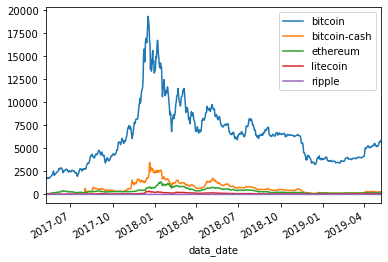

In [9]:
# Plot data_priceUsd for each crypto across time
grouped_cryptos = crypto_data.groupby('cryptocurrency')['data_priceUsd'].plot(legend=True)
grouped_cryptos